In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv
/kaggle/input/email-classification-nlp/SMS_train.csv
/kaggle/input/email-classification-nlp/SMS_test.csv


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Importing Data and Preprocessing

In [3]:
data1 = pd.read_csv('../input/spam-mails-dataset/spam_ham_dataset.csv')
data2 = pd.read_csv("../input/email-classification-nlp/SMS_train.csv", encoding='cp1252')

In [4]:
data1.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
data1 = data1.drop(['Unnamed: 0', 'label'], axis=1)
data1 = data1.rename(columns = {"label_num" : "Label"})
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5171 non-null   object
 1   Label   5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


<AxesSubplot:xlabel='Label', ylabel='count'>

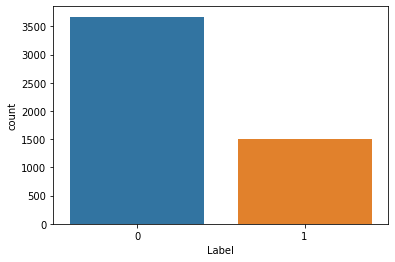

In [6]:
sns.countplot(x="Label", data = data1)

In [7]:
data2.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [8]:
data2 = data2.drop(["S. No."], axis = 1)
data2 = data2.rename(columns = {"Message_body" : "text"})
data2["Label"] = [1 if i == "Spam" else 0 for i in data2["Label"]]
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    957 non-null    object
 1   Label   957 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.1+ KB


<AxesSubplot:xlabel='Label', ylabel='count'>

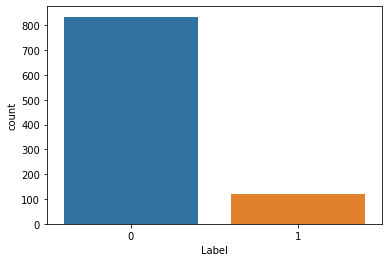

In [9]:
sns.countplot(x = "Label", data = data2)

In [10]:
frames = [data1, data2]
data = pd.concat(frames)
data

,text,Label
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
952,hows my favourite person today? r u workin har...,0
953,How much you got for cleaning,0
954,Sorry da. I gone mad so many pending works wha...,0
955,Wat time ü finish?,0


<AxesSubplot:xlabel='Label', ylabel='count'>

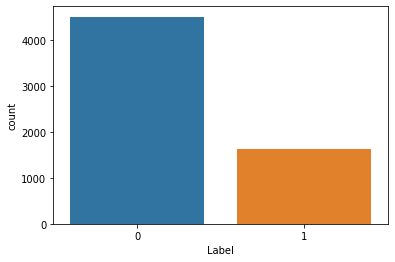

In [11]:
sns.countplot(x="Label", data = data)

# Visualization

Text(0.5, 1.0, 'Spam Word Cloud')

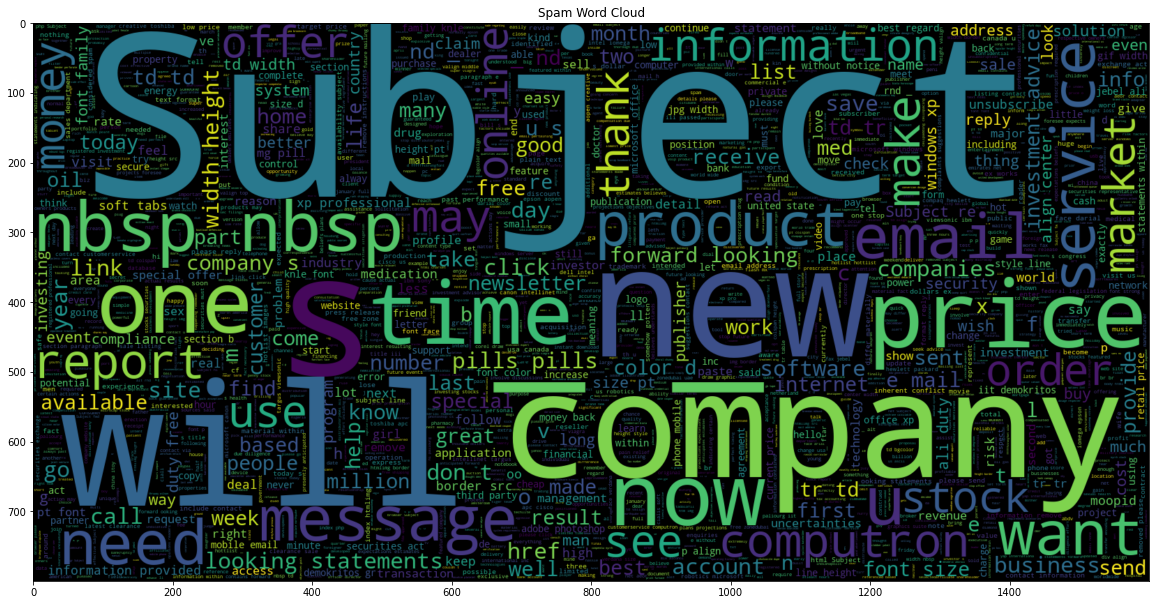

In [12]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Label == 1].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Spam Word Cloud")

Text(0.5, 1.0, 'Ham Word Cloud')

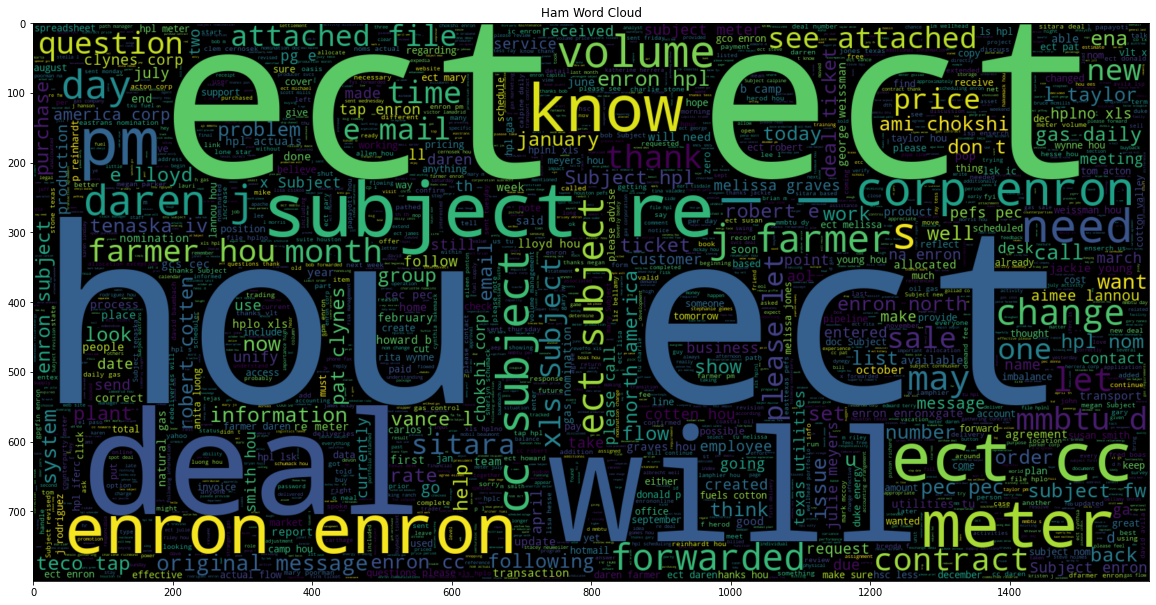

In [13]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Label == 0].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Ham Word Cloud")

## Stemming and Tokenizer

In [14]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]:\S+|subject:\S+|nbsp"

In [15]:
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

data.text = data.text.apply(lambda x: preprocess(x))
data.head()

,text,Label
0,subject: enron methanol ; meter # : 988291 fol...,0
1,"subject: hpl nom january 9 , 2001 ( see attach...",0
2,"subject: neon retreat ho ho ho , ' around wond...",0
3,"subject: photoshop , windows , office . cheap ...",1
4,subject: : indian springs deal book teco pvr r...,0


In [16]:
x = data['text']
y = data['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                         random_state=7)
print("Train Data size:", len(x_train))
print("Test Data size", len(x_test))

Train Data size: 4902
Test Data size 1226


In [17]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1000
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 45043


In [18]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(x_train),
                        maxlen = 50)
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test),
                       maxlen = 50)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (4902, 50)
Testing X Shape: (1226, 50)


# ANN

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
ann = Sequential()
ann.add(Dense(16, activation='relu', input_dim=50))
# Adding dropout to prevent overfitting
ann.add(Dropout(0.1))
ann.add(Dense(1, activation='sigmoid'))

In [21]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [22]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = ann.fit(x_train, y_train,
                  batch_size=10,
                  epochs=100,
                  verbose=2,
                  validation_data=(x_test, y_test))

Epoch 1/100
491/491 - 3s - loss: 1032.0997 - accuracy: 0.5082 - val_loss: 352.2621 - val_accuracy: 0.5865
Epoch 2/100
491/491 - 1s - loss: 270.5295 - accuracy: 0.5873 - val_loss: 136.1148 - val_accuracy: 0.5685
Epoch 3/100
491/491 - 1s - loss: 107.7676 - accuracy: 0.5855 - val_loss: 51.7061 - val_accuracy: 0.6476
Epoch 4/100
491/491 - 1s - loss: 45.0711 - accuracy: 0.6248 - val_loss: 25.5820 - val_accuracy: 0.6183
Epoch 5/100
491/491 - 1s - loss: 20.5066 - accuracy: 0.6414 - val_loss: 14.9657 - val_accuracy: 0.6607
Epoch 6/100
491/491 - 1s - loss: 10.7269 - accuracy: 0.6848 - val_loss: 8.8264 - val_accuracy: 0.6958
Epoch 7/100
491/491 - 1s - loss: 6.0686 - accuracy: 0.6818 - val_loss: 6.2544 - val_accuracy: 0.6680
Epoch 8/100
491/491 - 1s - loss: 3.6136 - accuracy: 0.7056 - val_loss: 3.9509 - val_accuracy: 0.7496
Epoch 9/100
491/491 - 1s - loss: 2.3402 - accuracy: 0.7197 - val_loss: 3.1870 - val_accuracy: 0.6639
Epoch 10/100
491/491 - 1s - loss: 1.8792 - accuracy: 0.7067 - val_loss: 2.

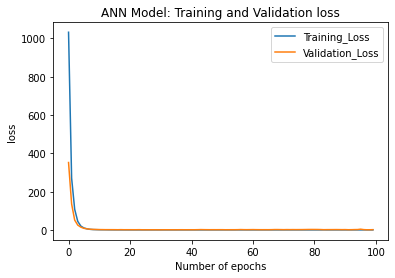

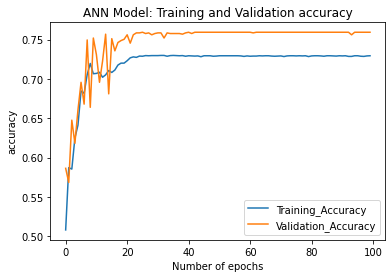

In [24]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('ANN Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [25]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [27]:
cm

array([[931,   0],
       [295,   0]])

In [28]:
print("Our accuracy is %{}".format(((cm[0][0] + cm[1][1])/1035)*100))

Our accuracy is %89.95169082125604


# RNN

In [29]:
from keras.layers import SimpleRNN
rnn = Sequential()
rnn.add(SimpleRNN(128, activation='relu', input_dim=50 , return_sequences = True))
rnn.add(SimpleRNN(64, activation='relu' ,  return_sequences = False))
# Adding dropout to prevent overfitting
#rnn.add(Dropout(0.1))
rnn.add(Dense(1, activation='sigmoid'))

In [30]:
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 128)         22912     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                12352     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 35,329
Trainable params: 35,329
Non-trainable params: 0
_________________________________________________________________


In [31]:
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
print(x_train.shape)
print(y_train.shape)

(4902, 50)
(4902,)


In [33]:
print(x_test.shape)
print(y_test.shape)

(1226, 50)
(1226,)


In [34]:
x_train1 = x_train.reshape(4902,1,50)
y_train1 = np.array(y_train).reshape(4902,1,1)

In [35]:
x_test1 = x_test.reshape(1226,1,50)
y_test1 = np.array(y_test).reshape(1226,1,1)

In [36]:
early_stop = EarlyStopping(monitor = 'val_loss', patience=60)

history = rnn.fit(x_train1, y_train1,
                  batch_size=100,
                  epochs=100,
                  verbose=2,
                  callbacks=[early_stop],
                  validation_data=(x_test1, y_test1))

Epoch 1/100
50/50 - 2s - loss: 372.2050 - accuracy: 0.6265 - val_loss: 172.7377 - val_accuracy: 0.6876
Epoch 2/100
50/50 - 0s - loss: 143.2931 - accuracy: 0.6869 - val_loss: 138.2757 - val_accuracy: 0.6648
Epoch 3/100
50/50 - 0s - loss: 94.6950 - accuracy: 0.7187 - val_loss: 171.4993 - val_accuracy: 0.4445
Epoch 4/100
50/50 - 0s - loss: 114.4714 - accuracy: 0.6987 - val_loss: 106.0532 - val_accuracy: 0.6093
Epoch 5/100
50/50 - 0s - loss: 53.8527 - accuracy: 0.7587 - val_loss: 103.1498 - val_accuracy: 0.7186
Epoch 6/100
50/50 - 0s - loss: 40.0209 - accuracy: 0.7911 - val_loss: 103.0494 - val_accuracy: 0.7251
Epoch 7/100
50/50 - 0s - loss: 35.7914 - accuracy: 0.7954 - val_loss: 102.1857 - val_accuracy: 0.7414
Epoch 8/100
50/50 - 0s - loss: 26.3692 - accuracy: 0.8121 - val_loss: 105.8271 - val_accuracy: 0.7594
Epoch 9/100
50/50 - 0s - loss: 51.8893 - accuracy: 0.7774 - val_loss: 116.3853 - val_accuracy: 0.7643
Epoch 10/100
50/50 - 0s - loss: 22.6115 - accuracy: 0.8295 - val_loss: 88.7783 

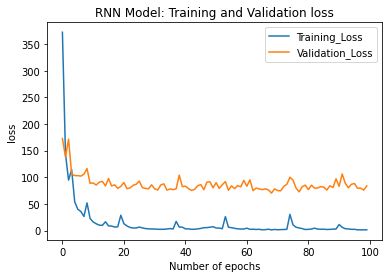

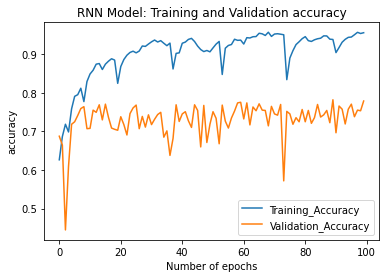

In [37]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('RNN Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [38]:
trainPredict = rnn.predict(x_train1)
testPredict= rnn.predict(x_test1)

predicted=np.concatenate((trainPredict,testPredict),axis=0)

In [39]:
trainScore = rnn.evaluate(x_train1, y_train1, verbose=0)
print("Our accuracy is %{}".format(trainScore[1]*100))

Our accuracy is %96.67482376098633


# LSTM

In [40]:
MAX_SEQUENCE_LENGTH = 50
n_lstm = 200
drop_lstm =0.2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional, GRU

In [41]:
embeding_dim = 16
drop_value = 0.2
n_dense = 24
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)

#LSTM Spam detection architecture
lstm = Sequential()
lstm.add(Embedding(vocab_size, embeding_dim, input_length=MAX_SEQUENCE_LENGTH))
lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
lstm.add(Dense(1, activation='sigmoid'))

In [42]:
lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [43]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = lstm.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=num_epochs, verbose=2, callbacks=[early_stop])

Epoch 1/30
154/154 - 7s - loss: 0.4026 - accuracy: 0.8285 - val_loss: 0.2719 - val_accuracy: 0.8948
Epoch 2/30
154/154 - 3s - loss: 0.2276 - accuracy: 0.9118 - val_loss: 0.3481 - val_accuracy: 0.7934
Epoch 3/30
154/154 - 2s - loss: 0.1986 - accuracy: 0.9217 - val_loss: 0.3107 - val_accuracy: 0.9014
Epoch 4/30
154/154 - 3s - loss: 0.1864 - accuracy: 0.9256 - val_loss: 0.2973 - val_accuracy: 0.9017
Epoch 5/30
154/154 - 2s - loss: 0.1782 - accuracy: 0.9275 - val_loss: 0.3412 - val_accuracy: 0.9000
Epoch 6/30
154/154 - 2s - loss: 0.1752 - accuracy: 0.9287 - val_loss: 0.3821 - val_accuracy: 0.8985


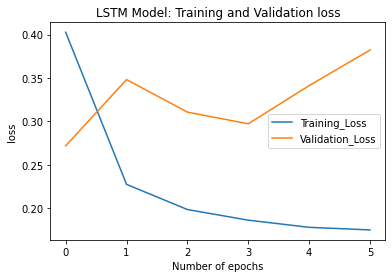

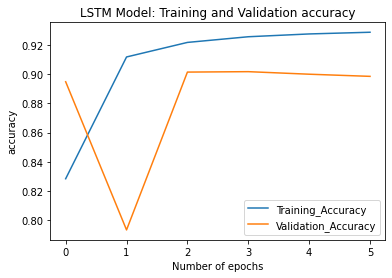

In [44]:
metrics = pd.DataFrame(history.history)

metrics.rename(columns= {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, 
               inplace = True)

def plot_graphs(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

plot_graphs('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [45]:
# make predictions
trainPredict2 = lstm.predict(x_train, batch_size=256)
lstm.reset_states()
testPredict2 = lstm.predict(x_test, batch_size=256)

In [46]:
predicted2=np.concatenate((trainPredict2,testPredict2),axis=0)

In [47]:
trainScore2 = lstm.evaluate(x_train, y_train, verbose=0)
print("Our accuracy is %{}".format(trainScore2[1]*100))

Our accuracy is %92.97391176223755


# Bi-LSTM

In [48]:
bi_lstm = Sequential()
bi_lstm.add(Embedding(vocab_size, embeding_dim, input_length=MAX_SEQUENCE_LENGTH))
bi_lstm.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
bi_lstm.add(Dense(1, activation='sigmoid'))

In [49]:
bi_lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [50]:
# Training
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)

history2 = bi_lstm.fit(x_train, y_train, epochs=num_epochs,
                    validation_data=(x_test, y_test),
                    callbacks =[early_stop], verbose=2)

Epoch 1/30
154/154 - 6s - loss: 0.3272 - accuracy: 0.8538 - val_loss: 0.1385 - val_accuracy: 0.9590
Epoch 2/30
154/154 - 2s - loss: 0.0817 - accuracy: 0.9778 - val_loss: 0.1425 - val_accuracy: 0.9629
Epoch 3/30
154/154 - 3s - loss: 0.0285 - accuracy: 0.9943 - val_loss: 0.1117 - val_accuracy: 0.9656
Epoch 4/30
154/154 - 2s - loss: 0.0151 - accuracy: 0.9978 - val_loss: 0.1017 - val_accuracy: 0.9706
Epoch 5/30
154/154 - 2s - loss: 0.0072 - accuracy: 0.9990 - val_loss: 0.1759 - val_accuracy: 0.9654
Epoch 6/30
154/154 - 2s - loss: 0.0758 - accuracy: 0.9817 - val_loss: 0.2562 - val_accuracy: 0.9216


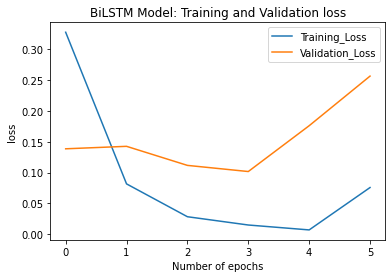

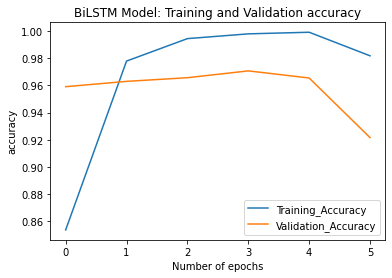

In [51]:
metrics = pd.DataFrame(history2.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [52]:
# make predictions
trainPredict3 = bi_lstm.predict(x_train, batch_size=256)
bi_lstm.reset_states()
testPredict3 = bi_lstm.predict(x_test, batch_size=256)

In [53]:
predicted3=np.concatenate((trainPredict3,testPredict3),axis=0)

In [54]:
trainScore3 = bi_lstm.evaluate(x_train, y_train, verbose=0)
print("Our accuracy is %{}".format(trainScore3[1]*100))

Our accuracy is %97.97754883766174
